   # ***Video Game Sales*** 🎮

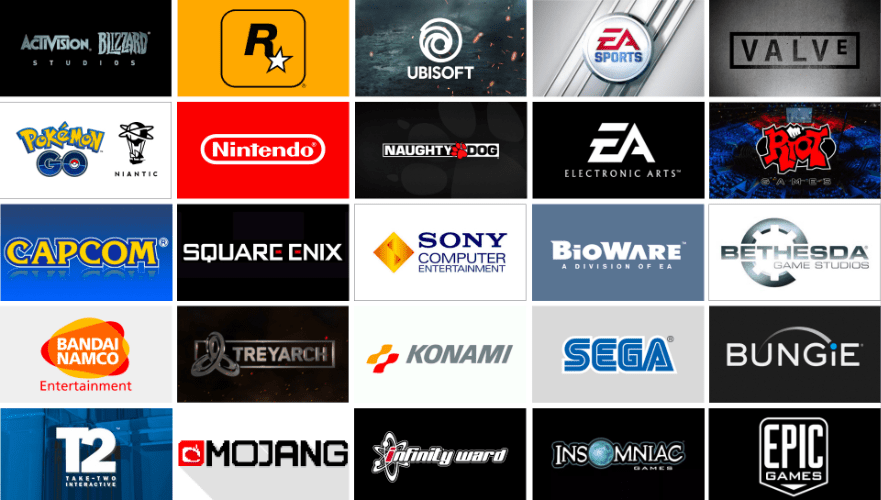


# Definición del objetivo
Con los datos históricos que se posee acerca de los videojuegos, géneros, plataformas y ventas, buscamos obtener indicios que demuestren qué tipos de plataformas serán las más utilizadas a futuro y qué genero tendrá mayor relevancia permitiendo desarrollar nueva información sobre futuras ventas.
# Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales están próximos a simular nuestra realidad, lo cual nos benificiaría a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, diseñar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas más importantes del mundo están en la búsqueda de tecnologías como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma más inmersiva.
# Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y géneros más relevantes de videojuegos.
# Contexto analítico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


### ***Serie de preguntas***

*   ¿Cuál fue la relación entre las ventas en Estados Unidos y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Europa y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Japón y el resto del mundo? 
*   ¿Cuáles son los juegos mas vendidos?
*   ¿Cuáles son los generos mas vendidos? 
*   ¿Cuál fue el formato de consola más utilizado?
*   ¿Cuál fue el desarrollador que obtuvo más ventas? 
*   ¿Cuál fue la evolución entre las plataformas a lo largo de los años? 

# ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [ ]:
url='https://raw.githubusercontent.com/leoomc97/datasets/main/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [ ]:
vgsales = pd.read_csv(url)

In [ ]:
df = pd.DataFrame(vgsales)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.shape

(16598, 11)

# ***EDA - Exploratory Data Analysis 📊***

## ***1) Data Wrangling***

Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

###Borrado de duplicados

In [ ]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


###Análisis de nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

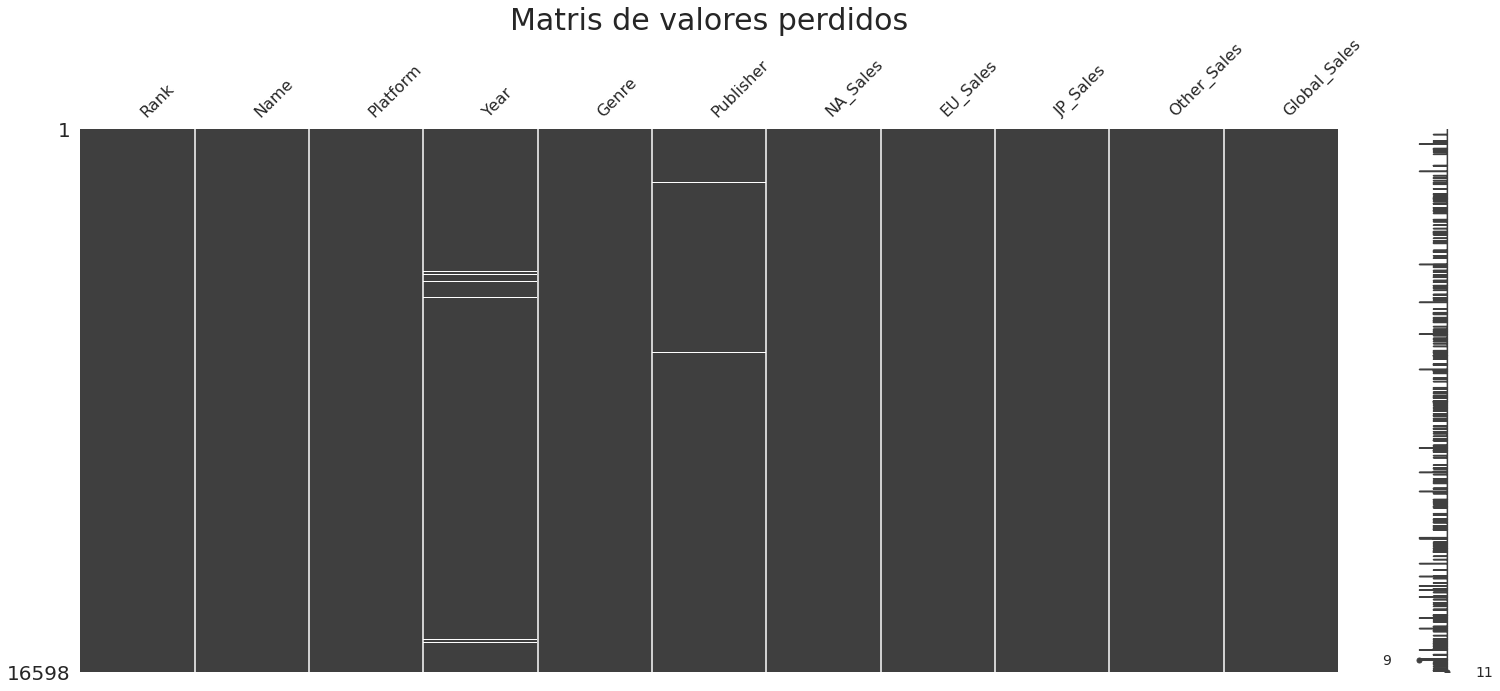

In [ ]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
Year,Year,1.632727
Publisher,Publisher,0.349440
Rank,Rank,0.000000
Name,Name,0.000000
Platform,Platform,0.000000
Genre,Genre,0.000000
NA_Sales,NA_Sales,0.000000
EU_Sales,EU_Sales,0.000000
JP_Sales,JP_Sales,0.000000
Other_Sales,Other_Sales,0.000000


<Figure size 1080x360 with 0 Axes>

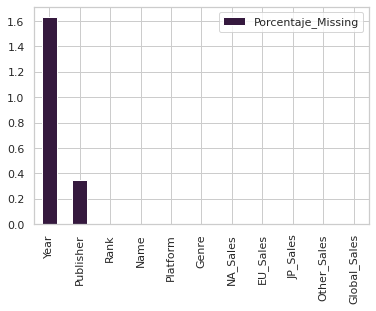

In [ ]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro análisis.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [ ]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisión: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.

In [ ]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

####Llenar con la catergoría "Desconocido"

In [ ]:
col_cat=['Publisher'] #Columnas categóricas

#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [ ]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

###Transformo el tipo de dato de las columnas

Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.

In [ ]:
df["Year"] = df["Year"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Verifico las transformaciones realizadas en el dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Finalmente, separo un dataframe con valores actuales, desde el año 2000 en adelante, que luego nos será de utilidad.

In [ ]:
df_new = df[df.Year >= 2012].sort_values("Year")
df_new

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2598,2600,The Walking Dead: Season One,PS3,2012,Adventure,Avanquest Software,0.40,0.25,0.03,0.11,0.79
11960,11962,The Legend of Heroes VII: The Trail of Zero,PSV,2012,Role-Playing,Falcom Corporation,0.00,0.00,0.07,0.00,0.07
11963,11965,Inversion,PS3,2012,Shooter,Namco Bandai Games,0.03,0.03,0.00,0.01,0.07
11966,11968,Zumba Fitness Core,X360,2012,Misc,505 Games,0.00,0.06,0.00,0.01,0.07
3201,3203,Taiko no Tatsujin: Chibi Dragon to Fushigi na Orb,3DS,2012,Misc,Namco Bandai Games,0.00,0.00,0.63,0.00,0.63
...,...,...,...,...,...,...,...,...,...,...,...
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


## ***2) Distribución e identificación de Outliers***

Continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis.

#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Estados Unidos:



Text(0, 0.5, 'Ventas en Estados Unidos')

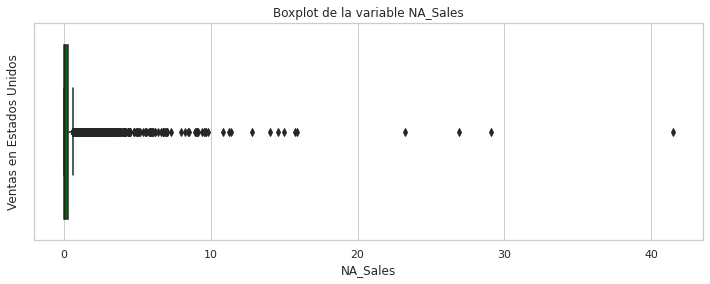

In [ ]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="NA_Sales", data=df, color='green')
plt.title('Boxplot de la variable NA_Sales')
ax.set_ylabel('Ventas en Estados Unidos')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [ ]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 30% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p30 = np.percentile(df['NA_Sales'], 30)
p90 = np.percentile(df['NA_Sales'], 90)

In [ ]:
dfp30=df[(df['NA_Sales'] <= p30)]
dfp30['NA_Sales'].describe()

count    4965.000000
mean        0.001059
std         0.003078
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.010000
Name: NA_Sales, dtype: float64

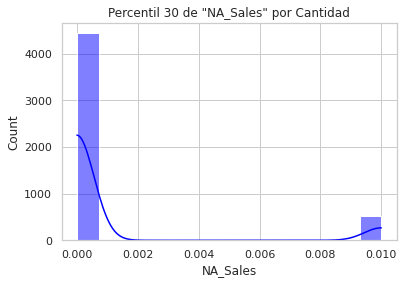

In [ ]:
#Histograma de ventas del percentil 30
sns.histplot(dfp30['NA_Sales'], color='blue',kde=True).set(title='Percentil 30 de "NA_Sales" por Cantidad')
plt.show()

In [ ]:
dfp90=df[(df['NA_Sales'] >= p90)]
dfp90['NA_Sales'].describe()

count    1660.000000
mean        1.620139
std         2.104160
min         0.610000
25%         0.780000
50%         1.060000
75%         1.720000
max        41.490000
Name: NA_Sales, dtype: float64

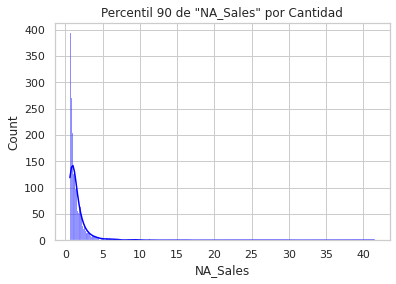

In [ ]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['NA_Sales'],color='blue',kde=True).set(title='Percentil 90 de "NA_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [ ]:
df = df[(df['NA_Sales'] >= p30) & (df['NA_Sales'] <= p90)]

In [ ]:
df['NA_Sales'].describe()

count    10259.000000
mean         0.162093
std          0.143056
min          0.010000
25%          0.050000
50%          0.110000
75%          0.230000
max          0.610000
Name: NA_Sales, dtype: float64

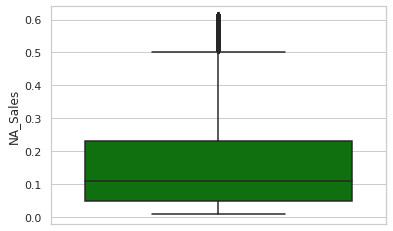

In [ ]:
ax = sns.boxplot(y=df['NA_Sales'], data=df,color='green')

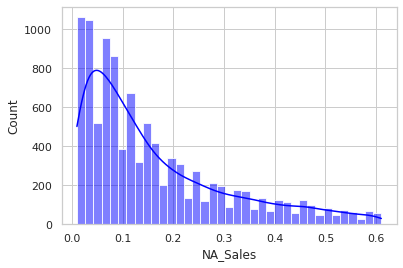

In [ ]:
ax = sns.histplot(df['NA_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.



#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Europa:



Text(0, 0.5, 'Ventas en Europa')

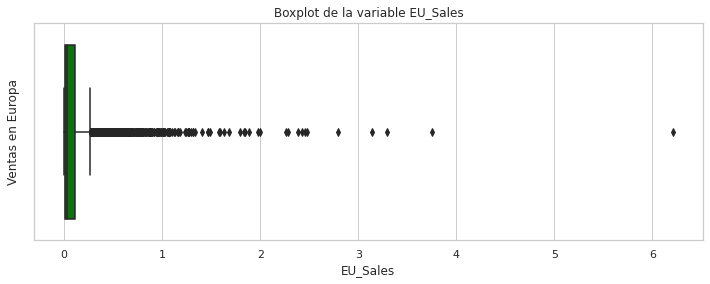

In [ ]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="EU_Sales", data=df, color='green')
plt.title('Boxplot de la variable EU_Sales')
ax.set_ylabel('Ventas en Europa')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [ ]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 30% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p30 = np.percentile(df['EU_Sales'], 30)
p90 = np.percentile(df['EU_Sales'], 90)

In [ ]:
dfp30=df[(df['EU_Sales'] <= p30)]
dfp30['EU_Sales'].describe()

count    3443.000000
mean        0.003517
std         0.004776
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         0.010000
Name: EU_Sales, dtype: float64

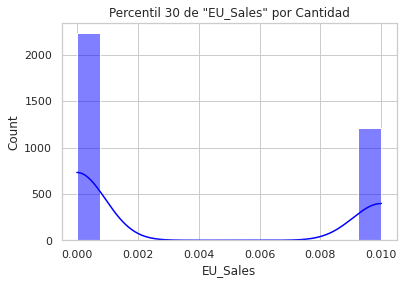

In [ ]:
#Histograma de ventas del percentil 30
sns.histplot(dfp30['EU_Sales'], color='blue',kde=True).set(title='Percentil 30 de "EU_Sales" por Cantidad')
plt.show()

In [ ]:
dfp90=df[(df['EU_Sales'] >= p90)]
dfp90['EU_Sales'].describe()

count    1037.000000
mean        0.481986
std         0.383468
min         0.250000
25%         0.300000
50%         0.370000
75%         0.510000
max         6.210000
Name: EU_Sales, dtype: float64

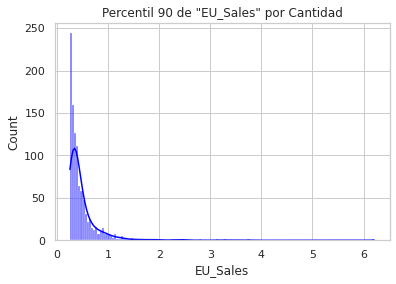

In [ ]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['EU_Sales'],color='blue',kde=True).set(title='Percentil 90 de "EU_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [ ]:
df = df[(df['EU_Sales'] >= p30) & (df['EU_Sales'] <= p90)]

In [ ]:
df['NA_Sales'].describe()

count    7052.000000
mean        0.153364
std         0.127929
min         0.010000
25%         0.060000
50%         0.110000
75%         0.210000
max         0.610000
Name: NA_Sales, dtype: float64

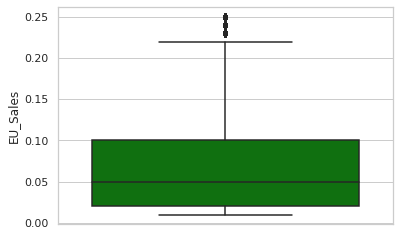

In [ ]:
ax = sns.boxplot(y=df['EU_Sales'], data=df,color='green')

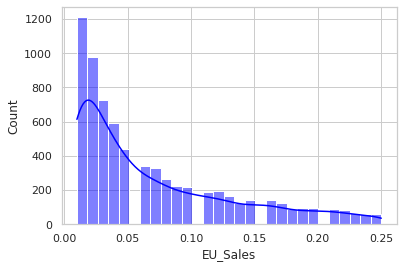

In [ ]:
ax = sns.histplot(df['EU_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.


#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Japón:



Text(0, 0.5, 'Ventas en Japón')

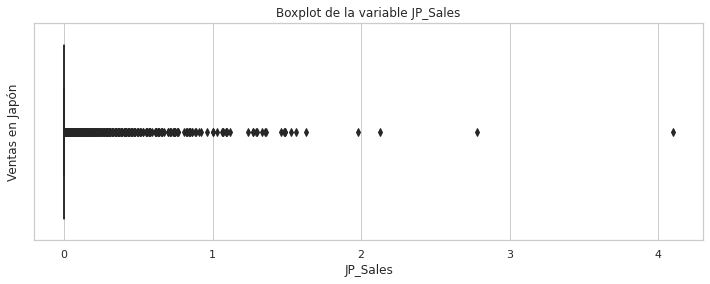

In [ ]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="JP_Sales", data=df, color='green')
plt.title('Boxplot de la variable JP_Sales')
ax.set_ylabel('Ventas en Japón')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [ ]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 90% y 99% e iremos cambiando para encontrar los outliers más distorsivos 
p90 = np.percentile(df['JP_Sales'], 90)
p99 = np.percentile(df['JP_Sales'], 99)

In [ ]:
dfp90=df[(df['JP_Sales'] <= p90)]
dfp90['JP_Sales'].describe()

count    6381.000000
mean        0.002280
std         0.009109
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.060000
Name: JP_Sales, dtype: float64

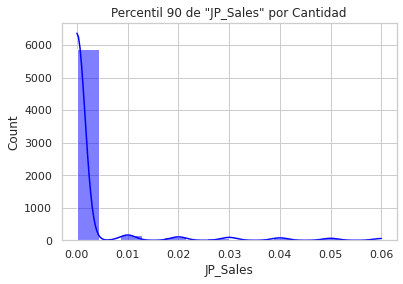

In [ ]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['JP_Sales'], color='blue',kde=True).set(title='Percentil 90 de "JP_Sales" por Cantidad')
plt.show()

In [ ]:
dfp99=df[(df['JP_Sales'] >= p99)]
dfp99['JP_Sales'].describe()

count    74.000000
mean      1.029595
std       0.536440
min       0.620000
25%       0.710000
50%       0.850000
75%       1.210000
max       4.100000
Name: JP_Sales, dtype: float64

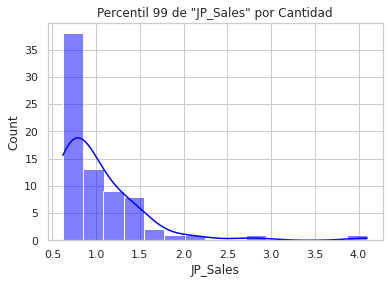

In [ ]:
#Histograma de ventas del percentil 99
sns.histplot(dfp99['JP_Sales'],color='blue',kde=True).set(title='Percentil 99 de "JP_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [ ]:
df = df[(df['JP_Sales'] >= p90) & (df['JP_Sales'] <= p99)]

In [ ]:
df['JP_Sales'].describe()

count    653.000000
mean       0.193124
std        0.130652
min        0.060000
25%        0.090000
50%        0.150000
75%        0.260000
max        0.620000
Name: JP_Sales, dtype: float64

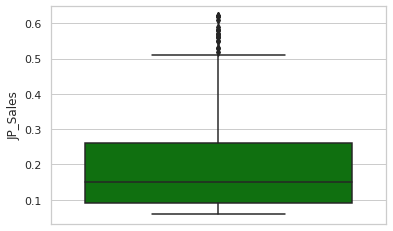

In [ ]:
ax = sns.boxplot(y=df['JP_Sales'], data=df,color='green')

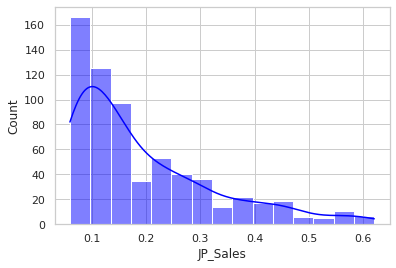

In [ ]:
ax = sns.histplot(df['JP_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.


#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Resto del Mundo:



Text(0, 0.5, 'Ventas en resto del mundo')

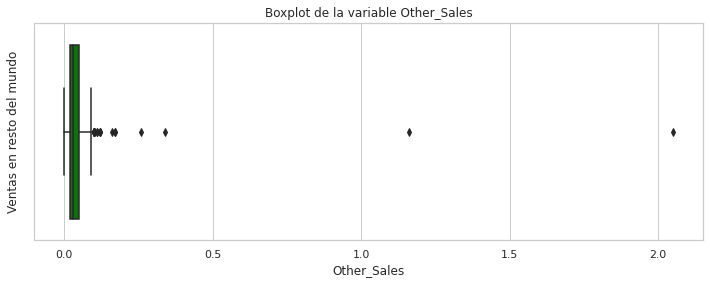

In [ ]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="Other_Sales", data=df, color='green')
plt.title('Boxplot de la variable Other_Sales')
ax.set_ylabel('Ventas en resto del mundo')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [ ]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 10% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p10 = np.percentile(df['Other_Sales'], 10)
p90 = np.percentile(df['Other_Sales'], 90)

In [ ]:
dfp10=df[(df['Other_Sales'] <= p10)]
dfp10['Other_Sales'].describe()

count    161.000000
mean       0.008882
std        0.003161
min        0.000000
25%        0.010000
50%        0.010000
75%        0.010000
max        0.010000
Name: Other_Sales, dtype: float64

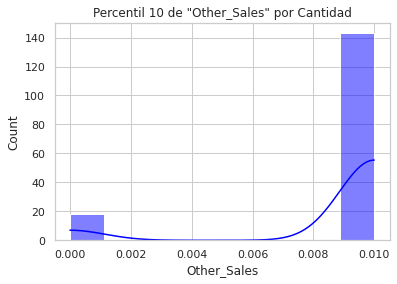

In [ ]:
#Histograma de ventas del percentil 10
sns.histplot(dfp10['Other_Sales'], color='blue',kde=True).set(title='Percentil 10 de "Other_Sales" por Cantidad')
plt.show()

In [ ]:
dfp90=df[(df['Other_Sales'] >= p90)]
dfp90['Other_Sales'].describe()

count    77.000000
mean      0.132338
std       0.255806
min       0.070000
25%       0.070000
50%       0.080000
75%       0.100000
max       2.050000
Name: Other_Sales, dtype: float64

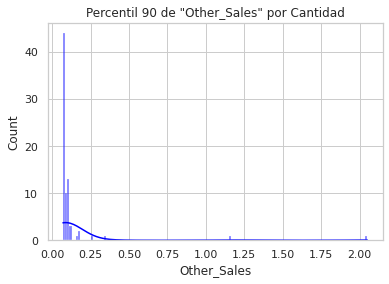

In [ ]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['Other_Sales'],color='blue',kde=True).set(title='Percentil 90 de "Other_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [ ]:
df = df[(df['Other_Sales'] >= p10) & (df['Other_Sales'] <= p90)]

In [ ]:
df['Other_Sales'].describe()

count    580.000000
mean       0.029207
std        0.017207
min        0.010000
25%        0.020000
50%        0.030000
75%        0.040000
max        0.070000
Name: Other_Sales, dtype: float64

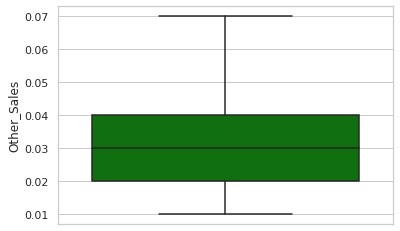

In [ ]:
ax = sns.boxplot(y=df['Other_Sales'], data=df,color='green')

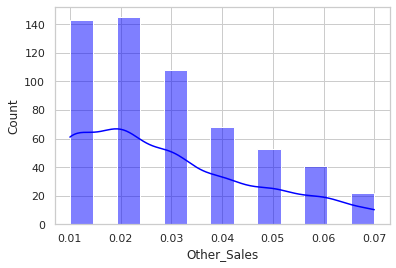

In [ ]:
ax = sns.histplot(df['Other_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.



Finalmente obtenemos el dataset con información relevante que utilizaremos para nuestro analisis.
Se puede apreciar una notable reducción de datos y características en comparación con el dataset original.

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1401,1403,Paper Mario,N64,2000,Role-Playing,Nintendo,0.58,0.18,0.59,0.02,1.38
1481,1483,Pokemon Ranger: Guardian Signs,DS,2010,Role-Playing,Nintendo,0.51,0.17,0.58,0.06,1.33
1573,1575,Final Fantasy IV,DS,2007,Simulation,Square Enix,0.54,0.05,0.62,0.05,1.26
1608,1610,Tetris 2 (All region sales),GB,1992,Puzzle,Nintendo,0.56,0.22,0.43,0.03,1.24
1623,1625,Castlevania,NES,1986,Platform,Konami Digital Entertainment,0.54,0.06,0.62,0.01,1.23
...,...,...,...,...,...,...,...,...,...,...,...
10112,10114,Samurai Warriors 4-II,PS4,2015,Action,Tecmo Koei,0.03,0.02,0.06,0.01,0.11
10378,10380,Carnage Heart,PS,1995,Strategy,Sony Computer Entertainment,0.01,0.01,0.09,0.01,0.11
10453,10455,Gallop Racer 2006,PS2,2005,Sports,Tecmo Koei,0.02,0.02,0.06,0.01,0.10
10660,10662,Atelier Sophie: The Alchemist of the Mysteriou...,PS4,2015,Role-Playing,Tecmo Koei,0.01,0.02,0.06,0.01,0.10


## ***3) Correlaciones y dependencias***

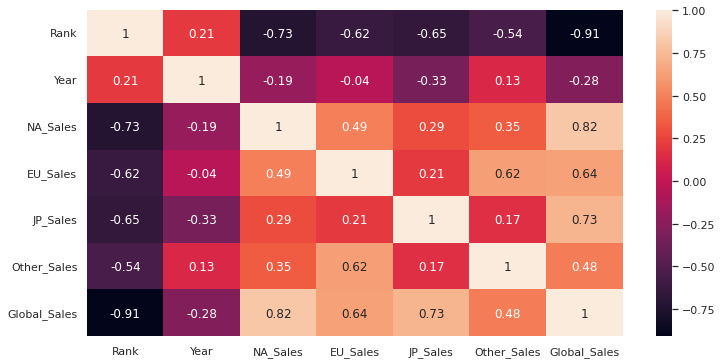

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Estados Unidos, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.82, 0.64 y 0.73 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas de Estados Unidos, Europa y Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones.

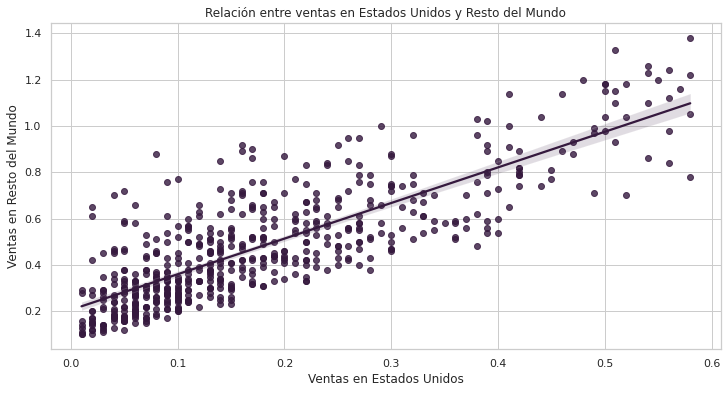

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Estados Unidos y Resto del Mundo')
plt.show()

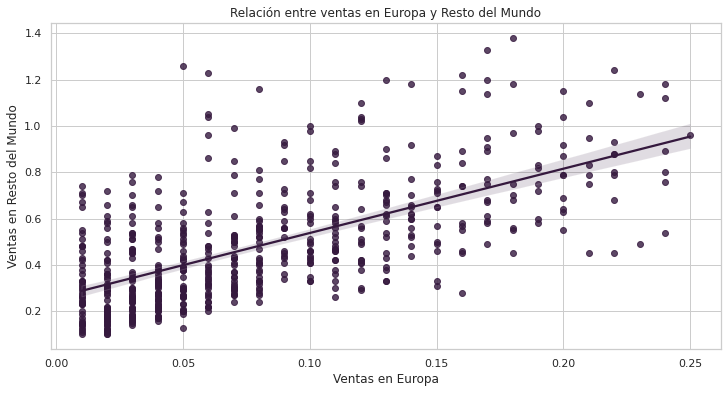

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Europa y Resto del Mundo')
plt.show()

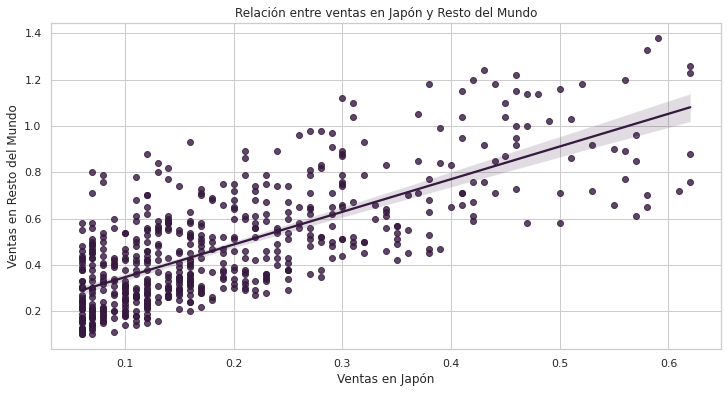

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Japón y Resto del Mundo')
plt.show()

Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones mencionadas, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.

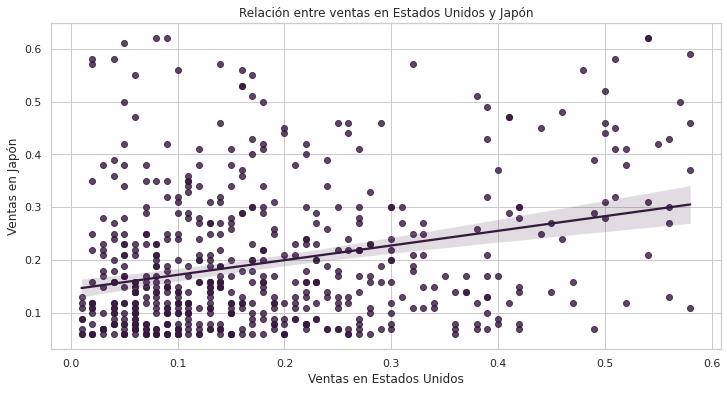

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Estados Unidos y Japón')
plt.show()

Pero si observamos la relación entre las ventas en Estados Unidos y Japón, se mantiene la hipótesis anterior, donde a mayor cantidad de ventas en una región, también crecen las ventas en las otras regiones. Sin embargo, podemos notar una menor correlación, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Japón tienen inclinación a distintos géneros y plataformas.

Más adelante podremos graficar y observar qué géneros y plataformas son las que más se consumen en cada región.

## ***4) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

###Análisis descriptivo e inferencial de las variables historicas

####Feature: "Year"

Proporción de ventas por año:

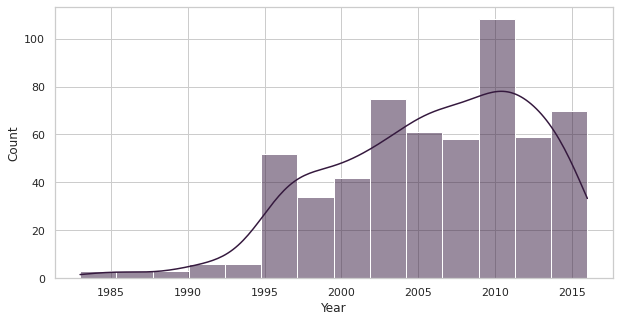

In [ ]:
f, axs = plt.subplots(figsize=(10, 5))
ax = sns.histplot(x="Year", data=df,kde=True)
plt.show()

Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

####Feature: "Platform"

Proporción de plataformas vendidas:

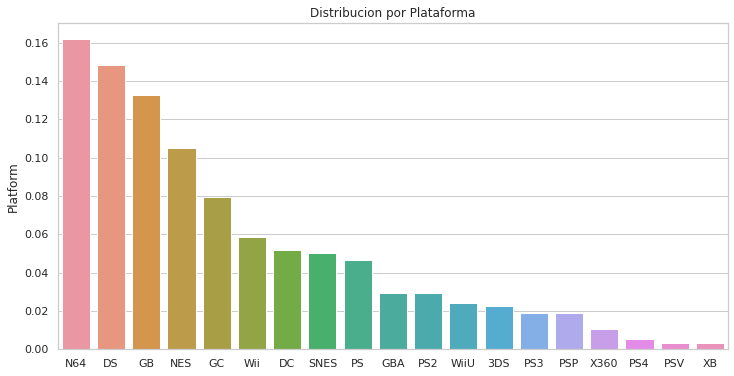

In [ ]:
plt.figure(figsize=(12, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar que las plataformas con un porcentaje considerable de ventas a lo largo de la historia fueron la Nintendo 64, la Nintendo DS, la GameBoy, la Nintendo NES, la GameCube y la Nintendo Wii, dejando mucho más atras a las conocidas Playstation y XBox.

![texto del enlace](https://www.rosario3.com/export/sites/rosario3/img/2021/06/28/1624775678_021044_1624775732_sumario_normal.jpg_344325628.jpg)


####Feature: "Genre"

Proporción de géneros vendidos:

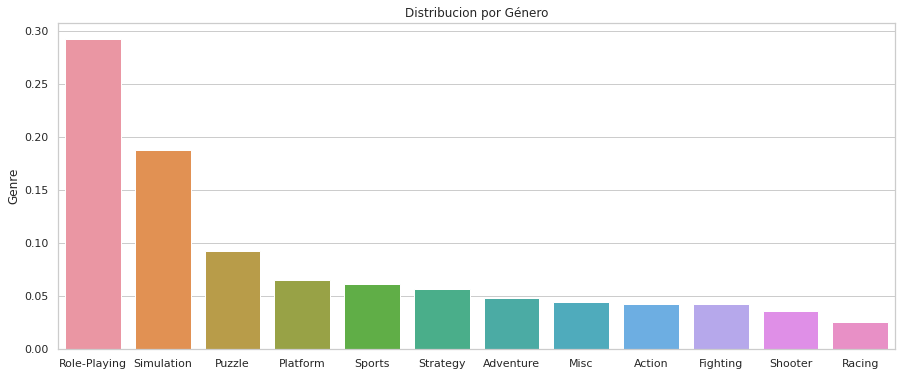

In [ ]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Género')
plt.show()

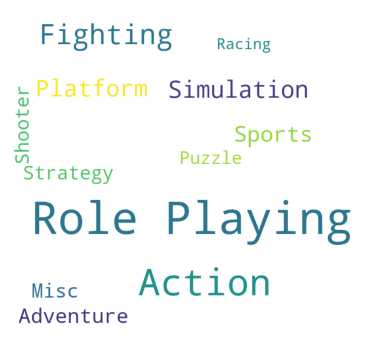

In [ ]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Se puede observar que los géneros más consumidos son el Role-Playing alcanzando casi el 30% del mercado, mientras lo siguen los juegos de Simulación, y en menor medida Puzzle, Platform, seguidos para nuestra sorpresa por Sports, Strategy, Adventure, Action, Fighting, Shooter y Racing.

####Feature: "Publisher"

Proporción de desarrolladores con más ventas:

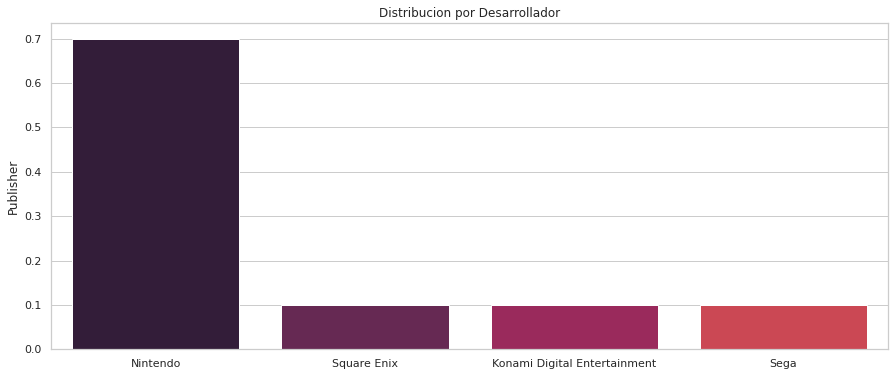

In [ ]:
plt.figure(figsize=(15, 6))
x=df.head(10)["Publisher"].unique()
y=df.head(10)["Publisher"].value_counts()/df.head(10)["Publisher"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 70% del mercado, seguido de Square Enix, y los conocidos Konami y Sega con apenas el 10% del mercado cada uno.

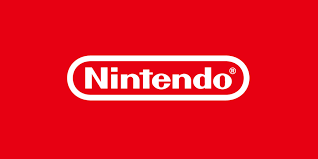







Proporción de desarrolladores con más ventas en los últimos 20 años:

####TOP 5 JUEGOS MÁS VENDIDOS HISTÓRICOS

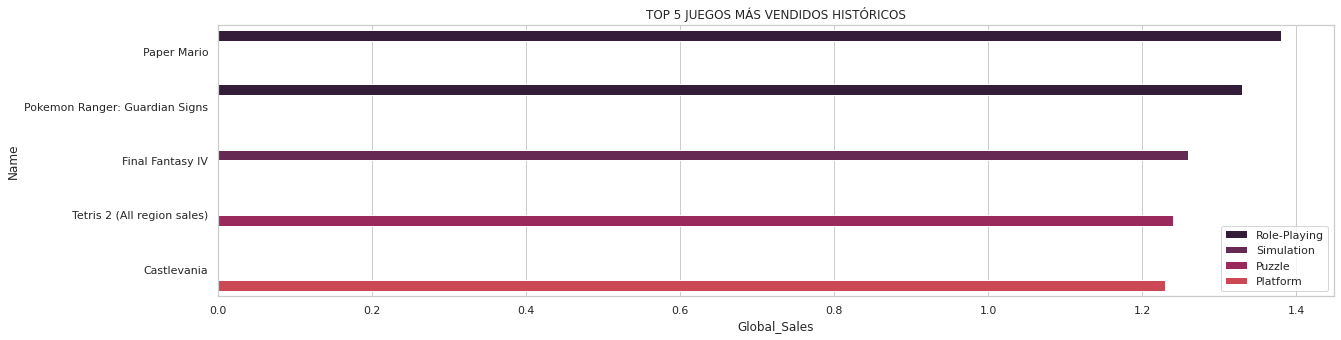

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(y='Name',x='Global_Sales',hue='Genre',data=df.sort_values("Global_Sales", ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS HISTÓRICOS')
plt.legend()

Podemos observar que en el top 5 de ventas históricas no se logra identificar un género que haya superado a los demás en ventas de forma desmesurada, sino que existe una gran homogeneidad en el tipo de juego y la cantidad de ventas. Liderando el Top 5 podemos encontrar clásicos como Mario y Tetris, y otras apariciones importantes con la llegada del Sega como Final Fantasy. Podemos notar también que los juegos de Simulación, Puzzle y Platform también se encuentran en el top 5, sin embargo, otros géneros como acción, shooter y deportes no han sido tan populares. 

Todos estos juegos lograron alcanzar un record entre 1.2 y 1.4 millones de ventas alrededor del mundo.

Recordemos también que las plataformas con más ventas que han acompañado estos juegos han sido las ofrecidas por Nintendo durante los 80's, los 90's y los años 2000.

###Análisis descriptivo e inferencial de las variables de la última década

####Feature: "Platform"

Proporción de plataformas vendidas en los últimos 10 años:

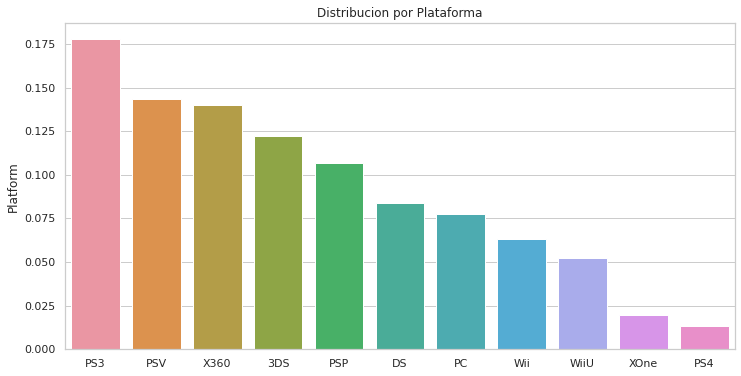

In [ ]:
plt.figure(figsize=(12, 6))
x=df_new["Platform"].unique()
y=df_new["Platform"].value_counts()/df_new["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Podemos notar que nuevas plataformas han aparecido la última década, logrando llevarse casi el 20% de las ventas por parte de Sony con la Playstation 3, y las Playstation Vita, seguido de Microsoft con las XBox360. Sin embargo, Nintendo ha logrado permanecer como uno de las grandes plataformas con su Nintendo DS y Nintendo Wii obteniendo apenas entre el 5 el 7,5% del mercado. Podemos también observar que aparece en este gráfico la opción de PC como plataforma de juegos gracias a los avances en procesadores y placas de video.

![texto del enlace](https://i.pinimg.com/originals/e0/bb/1a/e0bb1ae20f3a9e54a01f952a75e80def.jpg)

####Feature: "Genre"

Proporción de géneros vendidos en los últimos 10 años:

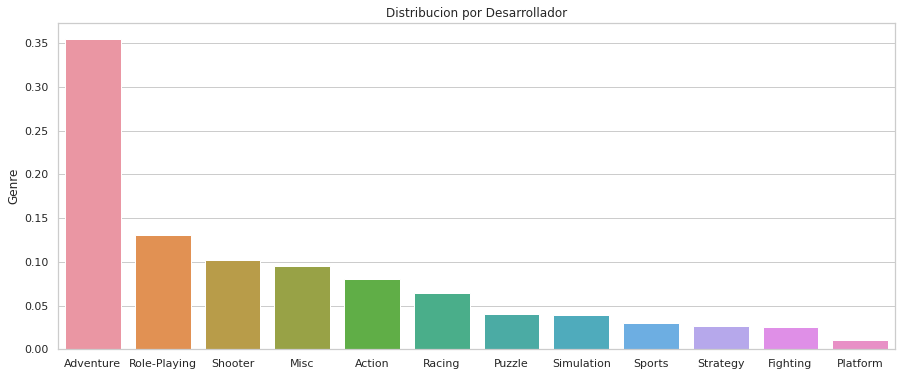

In [ ]:
plt.figure(figsize=(15, 6))
x=df_new["Genre"].unique()
y=df_new["Genre"].value_counts()/df_new["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Desarrollador')
plt.show()

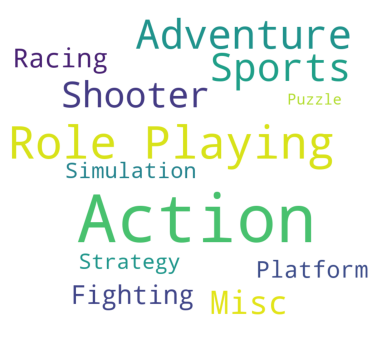

In [ ]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df_new['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Podemos notar que los juegos de aventura han tomado mucha más relevancia en las últimas décadas logrando casi el 35% del mercado actual. El género de Role-Playing ha caído a casi el 15% de las ventas del mercado, compitiendo directamente con los juegos de tipo Shooter, Acción y Racing que lograron tener una mayor popularidad al salir al mercado de la mano de las consolas de Playstation.

Es notable cómo los juegos de Role-Playing han dejado de tener un gran consumo así como los juegos de tipo Puzzle.


####Feature: "Publisher"

Proporción de desarrolladores con más ventas en los últimos 10 años:

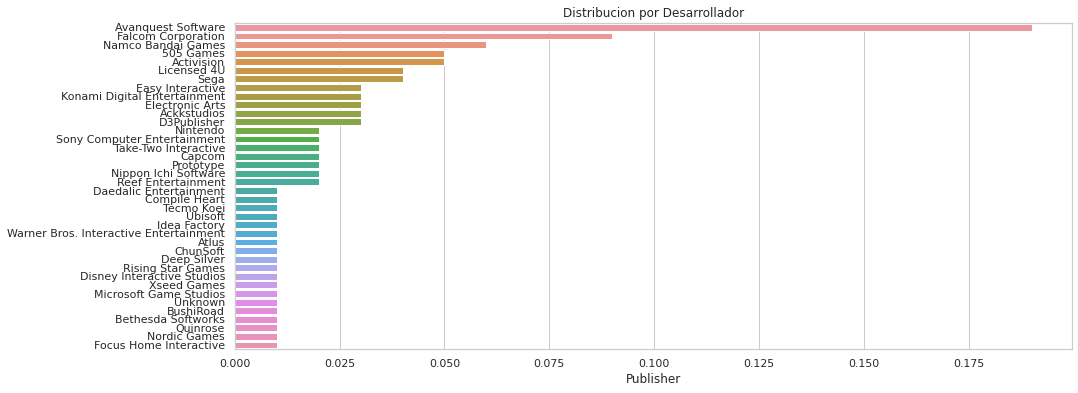

In [ ]:
plt.figure(figsize=(15, 6))
x=df_new.head(100)["Publisher"].unique()
y=df_new.head(100)["Publisher"].value_counts()/df_new.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que luego de los 2000 han aparecido una enorme variedad de desarrolladores de juegos y software, desatacando a Avanquest Software como proveedor de software y servicios a desarrolladores de juegos con el 20% del mercado, seguido de empresas más conocidas en el ambiente gamer como Activision, Electronic Arts, Sony (de la mano de las consolas de Playstation) y Bethesda.


Con el aumento del consumo de juegos de acción y aventura, podemos intuir que vino de la mano de la nueva generación de consolas como Playstation, y la aparición de nuevos desarrolladores como Activision y Electronic Arts.

![texto del enlace](https://static.wikia.nocookie.net/doblaje/images/e/e1/ACC.png/revision/latest?cb=20130715223833&path-prefix=es)







####TOP 5 JUEGOS MÁS VENDIDOS


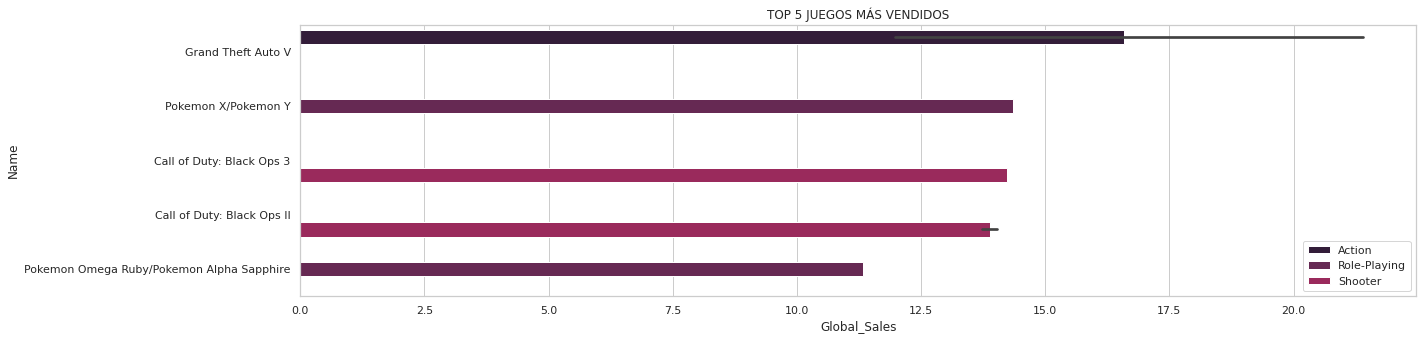

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(y='Name',x='Global_Sales',hue='Genre',data=df_new.sort_values("Global_Sales", ascending=False).head(8)).set_title('TOP 5 JUEGOS MÁS VENDIDOS')
plt.legend()

Podemos observar que en el top 5 de ventas de la última década que el género Acción ha superado a los demás en ventas de forma considerable, siendo acompañado por los juegos de tipo Role-Playing y Shooter. Liderando el Top 5 podemos encontrar grandes juegos como Grand Theft Auto V, y gracias a la llegada de nuevos desarrolladores como Activision han aparecido importantes sagas como Call of Duty. Podemos notar también que los juegos de Simulación, Puzzle y Platform han dejado de ser populares con la llegada de nuevas plataformas y géneros.

Todos estos juegos lograron alcanzar un record entre 10 y 15 millones de ventas alrededor del mundo, siendo record el Grand Theft Auto V superando las 20 millones de copias.

Tengamos en cuenta también que el auge de estos juegos vino acompañado de nuevas plataformas como Playstation y XBox, dejando atrás a aquellos juegos que han sido un éxito de Nintendo.

![texto del enlace](https://i.pinimg.com/originals/2f/89/81/2f8981f7375ed415d4c86ff55b5509eb.jpg)

###Evolución de las plataformas en el tiempo

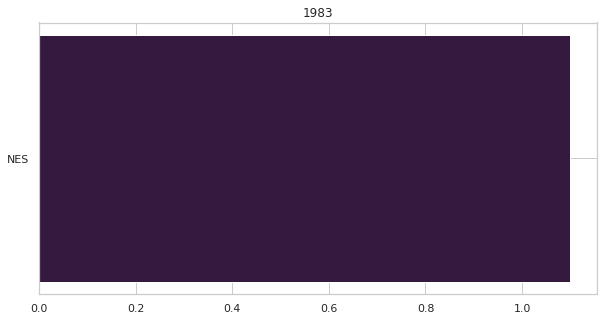

In [ ]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiará el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [ ]:
from IPython.display import HTML
HTML(animacion.to_html5_video())